In [1]:
import struct
import numpy as np
import array
import time
import pandas as pd
# import scipy.sparse
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./mnist_train.csv')[:4000]
# test = pd.read_csv('./mnist_test.csv', header=None)

matrix = df.as_matrix()
print matrix.shape
m = matrix.shape[0]
y = matrix[:,0:1]
X = matrix[:,1:]

# matrix_test = test.as_matrix()
# X_test = matrix_test[:,1:]
# m_test = X_test.shape[0]
# y_test = matrix_test[:,0:1]



(4000, 785)


In [5]:
print X.shape
print y.shape

(1000, 784)
(1000, 1)


### Hypothesis

$
h_\theta(x^{(i)}) = 
\begin{bmatrix}
    p(y^{(i)} = 1 \:|\: x{(i)};\theta) \\
    p(y^{(i)} = 2 \:|\: x{(i)};\theta) \\
    ... \\
    p(y^{(i)} = k \:|\: x{(i)};\theta) \\
\end{bmatrix}
=
\frac{1}{\sum_{j=1}^{k}e^{\theta^{T}_jx^{(i)}}}
\begin{bmatrix}
    e^{\theta^{T}_1x^{(i)}} \\
    e^{\theta^{T}_2x^{(i)}} \\
    ...                     \\
    e^{\theta^{T}_kx^{(i)}} \\
\end{bmatrix}
$


### Cost Function

$
J(\theta) = -\frac{1}{m}[\sum_{i=1}^{m}\sum_{j=1}^{k}1\{y^{(i)}=j\}\:log\frac{e^{\theta_j^Tx^{(i)}}}{\sum_{l=1}^{k}e^{\theta_l^Tx^{(i)}}}]
$

### Gradient


$
\Delta_{\theta_j}J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[x^{(i)}(1\{y^{(i)}=j\} - p(y^{(i)} = j\:|\:x^{(i)};\theta))] + \lambda\theta_j
$


In [23]:
print theta.shape
print X.shape

X.dot(theta)


(784, 10)
(1000, 784)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [25]:
print theta.shape

(784, 10)


In [31]:
aa = np.array([[1],[5]])
bb = np.array([[2,6]])

print aa.shape
print bb.shape

print aa .dot( bb )

(2, 1)
(1, 2)
[[ 2  6]
 [10 30]]


In [217]:
# theta = 0.0005 * np.random.rand(X.shape[1],len(np.unique(y)))

n_of_features = X.shape[1]
k = len(np.unique(y))
rand = np.random.RandomState(10)
theta = 0.0005 * rand.rand(n_of_features, k)

def hypothesis(X, theta):
    
    # Compute hypothesis
#     print 'X.shape', X.shape
#     print 'theta.shape', theta.shape
#     print 'X', X.T
#     print 'X[0]', X[0]
#     print 'X.shape', X.T.shape
#     print 'theta', theta.T
#     print 'theta.shape', theta.T.shape
    
#     print 'X.sum()', X.sum()
#     print 'theta.sum()', theta.sum()

#     print 'theta_x_1', np.dot(X, theta) 
    theta_x = np.dot(theta.T, X.T)
#     print 'theta_x', theta_x
#     print 'theta_x.shape', theta_x.shape
#     print 'theta_x.sum()', theta_x.sum()
    
    h = np.exp(np.dot(X, theta))
#     print 'h', h
    
    # Normalize the hypothesis so each row sums to 1
    summation = h.sum(axis=0)
#     print 'summation', summation
    h = h / summation

    return h

def to_one_hot(y):
    K = len(np.unique(y.ravel()))
    one_hot = np.zeros(shape=(m, K))
    for i, row in enumerate(one_hot):
        if i < 10:
            idx = y[i][0]
            row[idx] = 1
    return one_hot

def compute_weight_decay(theta, lam):
    theta_squared = theta ** 2
    weight_decay = 0.5 * lam * theta_squared.sum()
    return weight_decay

def softmax_cost(X, y, theta, lam=0.0001):
    m = X.shape[0]
    y_one_hot = to_one_hot(y)
    h = hypothesis(X, theta)
    traditional_cost = -(1.0)/m * (np.multiply(y_one_hot, np.log(h))).sum()

    weight_decay = compute_weight_decay(theta, lam)

    cost = traditional_cost + weight_decay
    gradient = compute_gradient(X, y, theta)
    return cost, gradient

def compute_gradient(X, y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta)
    y_one_hot = to_one_hot(y)
    errors = y_one_hot - h
    weights_decay = (0.5 * theta) #.sum()
    summation = np.dot(X.T, errors) #.sum() 
    return (-(summation / m)) + weights_decay
    
    
def gradient_descent(X, y, theta, num_of_iterations, alpha, lam):
    theta = 0.0005 * np.random.rand(X.shape[1],len(np.unique(y)))
    
    costs = []
    for i in range(num_of_iterations):
        if i % 100 == 0:
            print 'doing', i
        cost, gradient = softmax_cost(X, y, theta, lam)
        costs.append(cost)
        theta = theta - (alpha * gradient)
    return theta, costs

def feature_normalize(X):
    mean = np.mean(X)
    std = np.std(X, ddof=1)
    return ( X - mean ) / std

def normalize_0_1(X):
    _min = np.min(X)
    _max = np.max(X)
    return (X-_min) / float(_max - _min)
#     mean = np.mean(X)
#     std = np.std(X, ddof=1)
#     return ( X - mean ) / std

def gradient_checking(selectors, theta, epsilon):
    n, k = theta.shape
#     theta = theta.flatten()
    grad_approx = np.zeros(len(selectors));
#     for i, _ in enumerate(theta):
    for i, sel in enumerate(selectors):
#         print i
        theta_plus = theta.copy()
        theta_minus = theta.copy()
        
        theta_plus[sel]  += epsilon
        theta_minus[sel] -= epsilon
        
        cost_plus, _ = softmax_cost(X, y, theta_plus, 0.001)
#         print 'cost_plus ', cost_plus
#         print _
#         print _.shape
        cost_minus, _ = softmax_cost(X, y, theta_minus, 0.001)
#         print 'cost_minus', cost_minus
        grad_approx[i] = (cost_plus - cost_minus) / (2 * epsilon)
    return grad_approx
#     return theta.reshape(n, k)


def reshape_gradient(gradient, sel):
    gradient_reshaped = np.zeros(len(sel))
    for i, s in enumerate(sel):
        gradient_reshaped[i] = gradient[s]
#     print gradient_reshaped.shape
    return gradient_reshaped

def generate_selector(theta):
#     sel = np.full(theta.shape, False, dtype=bool)
    sel = []
    i = 0
    for a, __ in np.ndenumerate(theta):
        if i % 401 == 0:
#             print i
#             sel[a] = True
            sel.append(a)
        i += 1
    return sel


def calc_gradient_diff(gradient_check, gradient, sel):
#     print gradient.shape
    nn = gradient.shape[0] * gradient.shape[1]
    multiplier = float(nn) / len(sel)
    gradient_check_actual = reshape_gradient(gradient, sel)
    return (gradient_check - gradient_check_actual).sum() * multiplier

In [220]:

sel = generate_selector(theta)

gradient_check = gradient_checking(sel, theta, 0.0001)
cost, gradient = softmax_cost(X, y, theta, 0.0001)

calc_gradient_diff(gradient_check, gradient, sel)
    


0.48164336036319993

In [210]:
print gradient_check.shape
# print gradient[sel].shape
# print gradient[sel]
gradients = np.zeros(len(sel))
for i, s in enumerate(sel):
    gradients[i] = gradient[s]
print gradients.shape

print (gradient_check - gradients).sum()

(154,)
(154,)
-0.0268010144068


In [188]:
# 
rand = np.random.RandomState(13)
# theta = 0.0005 * rand.rand(n_of_features, k)
theta = 1 * rand.rand(n_of_features, k)


X_normalized = feature_normalize(X)
# new_theta, costs = gradient_descent(X_normalized, y, theta, 50, 1, 0.0001)
new_theta, costs = gradient_descent(s, y, theta, 100, 0.15, 0.05)

NameError: name 's' is not defined

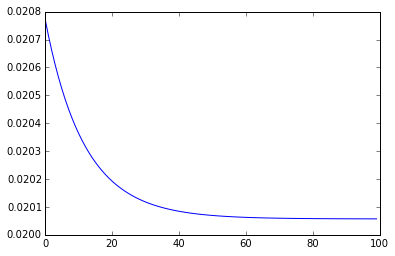

In [33]:
plt.plot(costs)
# print costs

In [34]:
hyp = hypothesis(X, new_theta)
predicted_table = np.argmax(hyp, axis=1)
predicted_table = np.reshape(predicted_table, (m,1))
correct = (predicted_table == y).sum()
print float(correct) / m

0.21225


In [239]:
# opt_solution = scipy.optimize.minimize(
#     softmax_cost,
#     theta,
#     args = (
#         X,
#         y,
#     ),
#     method = 'L-BFGS-B',
#     jac = True,
#     options = {
#         'maxiter': 10
#     }
# )
# # opt_theta = opt_solution.x

In [18]:

alpha = 0.0001
lam = 0.0001

# theta = 0.0005 * rand.rand(n_of_features, k)
# print 'theta', theta
# X_normalized = normalize_0_1(X)
# print 'X_normalized', X_normalized[0]
# print 'hypothesis', hypothesis(X_normalized, theta)
# print 'decay', compute_weight_decay(theta, lam)
# cost, gradient = softmax_cost(X_normalized, y, theta, lam)
# print 'cost', cost
# print 'gradient', gradient

In [212]:
# print X.T * errors

In [9]:
print X[0]
print y.T
print theta

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

In [ ]:
print X
# print y
print theta

In [33]:
print np.dot(X, theta)

[[ 7.02750991  7.65829303  8.22492154 ...,  7.57622251  7.71207028
   7.86756045]
 [ 4.59951021  5.17384386  4.93871541 ...,  4.73542002  4.88209247
   5.10557152]
 [ 3.966941    4.10703155  4.34924595 ...,  3.72894257  4.59960936
   4.79950616]
 ..., 
 [ 4.94369233  5.86620593  5.6433769  ...,  4.93204326  5.88177398
   5.57196998]
 [ 6.09087626  6.60208114  7.0593024  ...,  5.8579878   6.36091286
   6.73509632]
 [ 5.75268281  6.29468164  6.62473448 ...,  5.72080664  5.6044771
   6.28099406]]
